In [1]:
import os
import cv2
import numpy as np
from mtcnn import MTCNN
from tqdm import tqdm
import tensorflow as tf

# كاشف الوجوه
detector = MTCNN()

# المسار إلى البيانات
dataset_path = r"C:\Users\kirolosAnwar\Desktop\AMIT\dataset"

# قوائم لتخزين النتائج
faces = []
labels = []
label_names = []

# تصفح المجلدات (كل شخص في مجلد)
for i, person in enumerate(os.listdir(dataset_path)):
    person_path = os.path.join(dataset_path, person)
    if not os.path.isdir(person_path):
        continue

    label_names.append(person)

    for image_name in tqdm(os.listdir(person_path), desc=f"Processing {person}"):
        image_path = os.path.join(person_path, image_name)

        # قراءة الصورة
        img = cv2.imread(image_path)
        if img is None:
            continue

        # كشف الوجوه
        results = detector.detect_faces(img)
        if results:
            x, y, w, h = results[0]['box']
            x, y = abs(x), abs(y)
            face = img[y:y+h, x:x+w]

            # تغيير الحجم
            face = cv2.resize(face, (200, 200))

            # حفظ الوجه والليبل
            faces.append(face)
            labels.append(i)

# تحويل إلى numpy arrays
faces = np.array(faces)
labels = np.array(labels)

print("عدد الصور المعالجة:", faces.shape)
print("الأشخاص:", label_names)

# حفظ النتائج
np.save("faces.npy", faces)
np.save("labels.npy", labels)
np.save("label_names.npy", label_names)


Processing happy:   2%|▏         | 229/10907 [00:11<09:07, 19.52it/s]


KeyboardInterrupt: 

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# load for photos
faces = np.load("faces.npy")
labels = np.load("labels.npy")
label_names = np.load("label_names.npy")
faces = faces.astype('float32') / 255.0


x_train, x_test, y_train, y_test = train_test_split(faces, labels, test_size=0.3, random_state=42, stratify=labels)
num_classes = len(np.unique(labels))

# model defenation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# model optimizing
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model traning
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# save model
model.save("face_recognition_model.h5")



C:\Users\kirolosAnwar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms/step - accuracy: 0.1992 - loss: 3.3083 - val_accuracy: 0.2133 - val_loss: 1.6100
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 0.2187 - loss: 1.6017 - val_accuracy: 0.2133 - val_loss: 1.6006
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.2841 - loss: 1.5773 - val_accuracy: 0.3867 - val_loss: 1.5804
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 351ms/step - accuracy: 0.2476 - loss: 1.5763 - val_accuracy: 0.3867 - val_loss: 1.5606
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.3037 - loss: 1.5713 - val_accuracy: 0.4000 - val_loss: 1.5139
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.3585 - loss: 1.4541 - val_accuracy: 0.3467 - val_loss: 1.4734
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.3043 - loss: 1.4529 - val_accuracy: 0.3867 - val_loss: 1.4915
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - accuracy: 0.3339 - loss: 1.4334 - val_accuracy: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
(Accuracy): 88.12%
 Precision: 0.88
 Recall: 0.88
 F1 Score: 0.88

(Classification Report):
                         precision    recall  f1-score   support

                kirolos       0.91      1.00      0.95        30
      pins_Adriana Lima       0.87      0.84      0.86        32
      pins_Alex Lawther       0.83      0.91      0.87        33
pins_Alexandra Daddario       0.83      0.74      0.78        34
      pins_Alvaro Morte       0.97      0.94      0.95        31

               accuracy                           0.88       160
              macro avg       0.88      0.88      0.88       160
           weighted avg       0.88      0.88      0.88       160



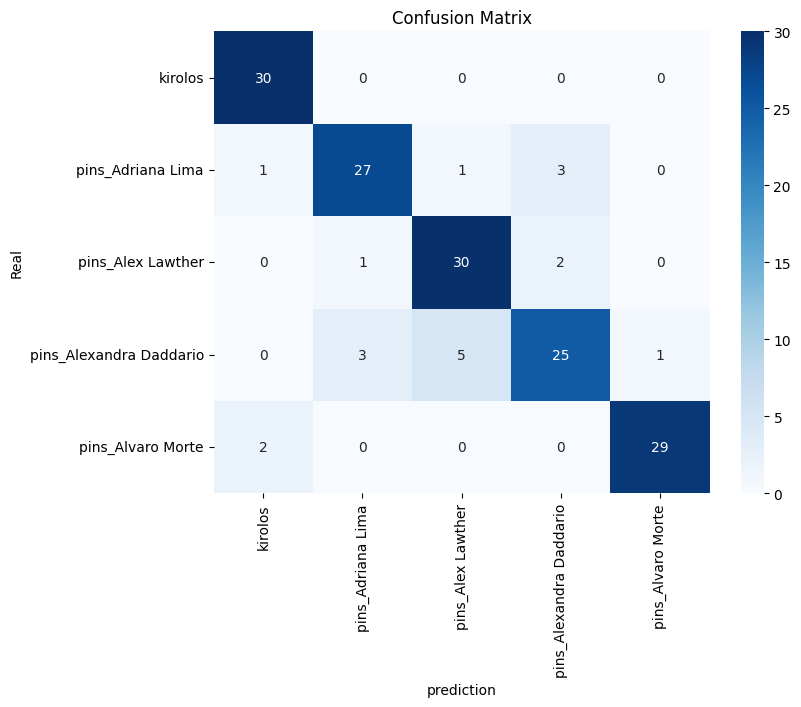

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# توقع النموذج
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# الدقة الإجمالية
acc = accuracy_score(y_test, y_pred_labels)
print(f"(Accuracy): {acc*100:.2f}%")

# الحساب اليدوي للمقاييس
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

print(f" Precision: {precision:.2f}")
print(f" Recall: {recall:.2f}")
print(f" F1 Score: {f1:.2f}")

# التقرير التفصيلي حسب كل شخص
print("\n(Classification Report):")
print(classification_report(y_test, y_pred_labels, target_names=label_names))

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_labels)

# رسم المصفوفة
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap='Blues')
plt.xlabel("prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()


C:\Users\kirolosAnwar\AppData\Local\Temp\ipykernel_19664\3672438192.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


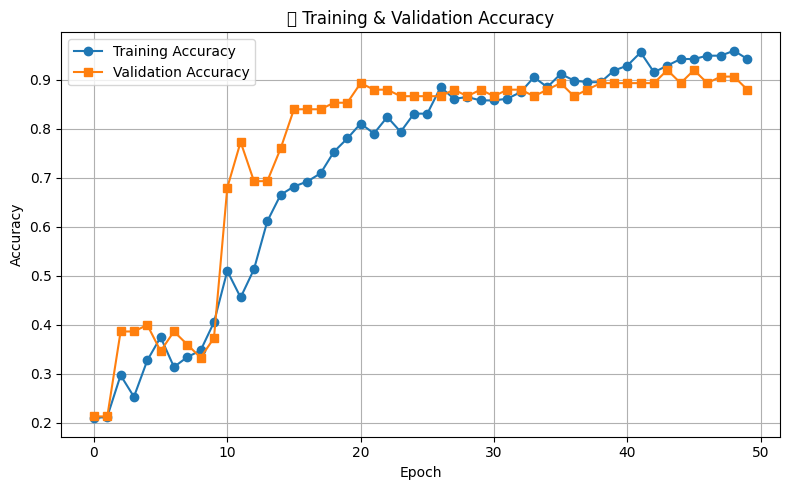

In [4]:
import matplotlib.pyplot as plt

# رسم Accuracy التدريب والتحقق (validation)
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('📈 Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\kirolosAnwar\AppData\Local\Temp\ipykernel_19664\3453315755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="viridis")


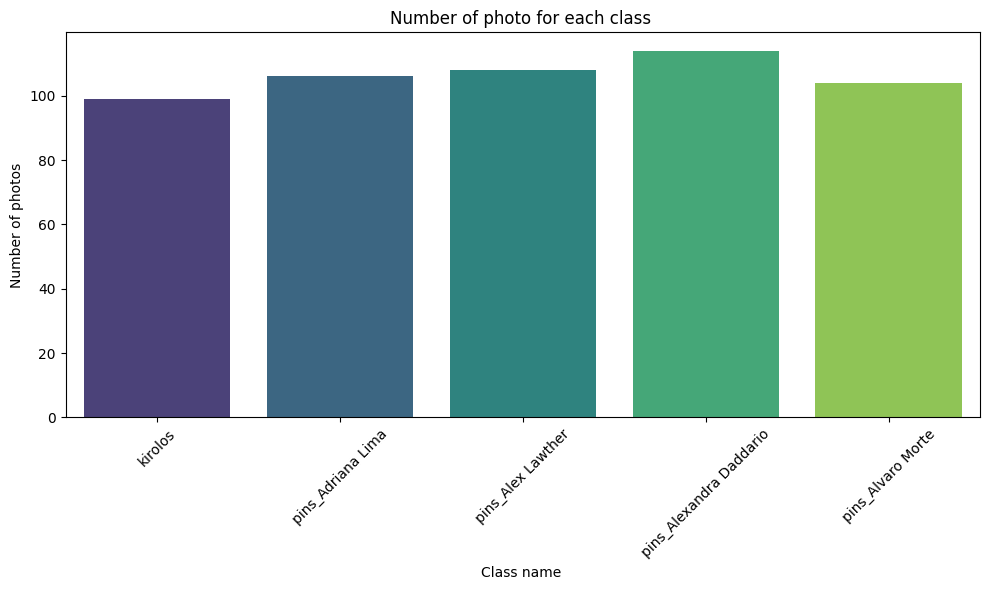

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم عدد الصور لكل كلاس
plt.figure(figsize=(10, 6))
sns.countplot(x=labels, palette="viridis")

# تعديل أسماء الكلاسات (لو عندك label_names)
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=45)
plt.title("Number of photo for each class ")
plt.xlabel("Class name ")
plt.ylabel("Number of photos")
plt.tight_layout()
plt.show()

C:\Users\kirolosAnwar\AppData\Local\Temp\ipykernel_19664\3875377134.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


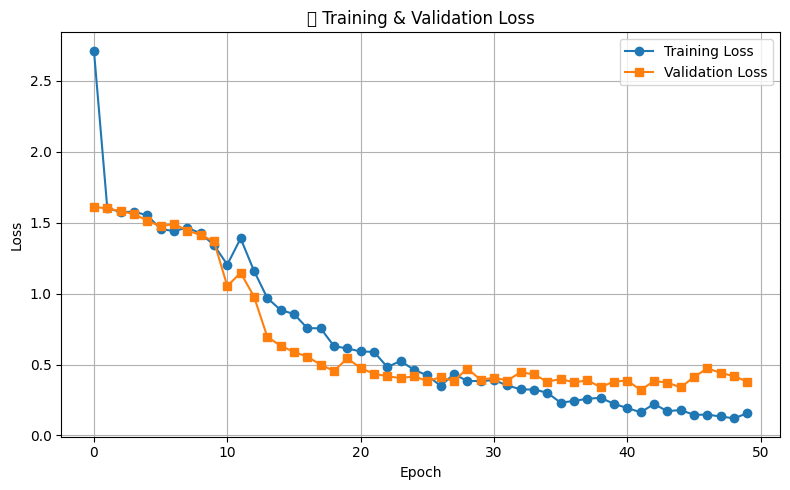

In [6]:
# رسم Loss التدريب والتحقق
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('📉 Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import os
import cv2
import numpy as np
from mtcnn import MTCNN
import tensorflow as tf

# تحميل الموديل والليبلات
model = tf.keras.models.load_model("face_recognition_model.h5")
label_names = np.load("label_names.npy")
detector = MTCNN()

# مجلد الصور ومجلد الحفظ
test_folder = r"C:\Users\kirolosAnwar\Desktop\AMIT\New folder"
output_folder = r"C:\Users\kirolosAnwar\Desktop\AMIT\result"
os.makedirs(output_folder, exist_ok=True)

# إعدادات تصغير الصورة
max_width = 800  # العرض الأقصى في البيكسل

# معالجة الصور
for filename in os.listdir(test_folder):
    image_path = os.path.join(test_folder, filename)
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ لا يمكن قراءة الصورة: {filename}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = detector.detect_faces(img_rgb)

    if not results:
        print(f"😕 لم يتم الكشف عن وجه في {filename}")
        continue

    for result in results:
        x, y, w, h = result['box']
        x, y = abs(x), abs(y)
        face = img_rgb[y:y+h, x:x+w]
        try:
            face = cv2.resize(face, (200, 200))
        except:
            print(f"⚠️ خطأ في تغيير حجم الوجه في {filename}")
            continue

        face_input = face.astype('float32') / 255.0
        face_input = np.expand_dims(face_input, axis=0)

        pred = model.predict(face_input)
        label_index = np.argmax(pred)
        confidence = float(np.max(pred))
        name = label_names[label_index]

        # تصغير حجم المربع بنسبة 15%
        shrink_ratio = 0.15
        x_shrink = int(w * shrink_ratio)
        y_shrink = int(h * shrink_ratio)

        x1 = x + x_shrink
        y1 = y + y_shrink
        x2 = x + w - x_shrink
        y2 = y + h - y_shrink

        # رسم المربع الأصغر
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # الكتابة فوق المربع الجديد
        cv2.putText(img_rgb, f"{name} ({confidence*100:.1f}%)", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # تقليل حجم الصورة قبل الحفظ (عرض أقصى 800)
    height, width = img_rgb.shape[:2]
    if width > max_width:
        scale = max_width / width
        new_size = (int(width * scale), int(height * scale))
        img_rgb = cv2.resize(img_rgb, new_size)

    # حفظ الصورة بعد التعديل
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
    print(f"✅ تم حفظ الصورة: {output_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desktop\AMIT\result\Adriana Lima0_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desktop\AMIT\result\Adriana Lima1_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desktop\AMIT\result\Adriana Lima6_179.jpg
😕 لم يتم الكشف عن وجه في Alex Lawther0_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desktop\AMIT\result\Alex Lawther3_104.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desktop\AMIT\result\Alex Lawther4_112.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desktop\AMIT\result\Alex Lawther5_120.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desktop\AMIT\result\Alexandra Daddario0_214.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ تم حفظ الصورة: C:\Users\kirolosAnwar\Desk

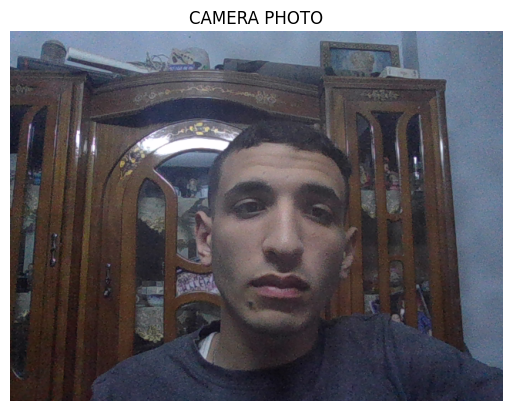

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
🧠 predction kirolos (99.99%)


In [9]:
import cv2
import numpy as np
from mtcnn import MTCNN
import tensorflow as tf
import matplotlib.pyplot as plt

# تحميل الموديل والليبلات
model = tf.keras.models.load_model('face_recognition_model.h5')
label_names = np.load('label_names.npy', allow_pickle=True)
detector = MTCNN()

def preprocess_image(img):
    """كشف الوجه وقصه وتغيير الحجم والتطبيع"""
    results = detector.detect_faces(img)
    if results:
        x, y, w, h = results[0]['box']
        x, y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (200, 200))
        face = face.astype('float32') / 255.0
        return np.expand_dims(face, axis=0)
    return None

# فتح كاميرا اللابتوب
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    print("❌ لم يتم التقاط صورة من الكاميرا")
else:
    # عرض الصورة باستخدام matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title("CAMERA PHOTO")
    plt.show()

    # معالجة الوجه
    face = preprocess_image(frame)
    if face is not None:
        # التنبؤ
        pred = model.predict(face)
        label_index = np.argmax(pred)
        confidence = float(np.max(pred))
        name = label_names[label_index]


        # عرض النتيجة
        print(f"🧠 predction {name} ({confidence*100:.2f}%)")
    else:
        print("cannot find the face")
